# Dispenser Testing

## Setup

### Relevant Imports

In [1]:
import asyncio
from Scale import Scale
from ClearCore import ClearCore
from dispenser import Dispenser
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

### Instantiate Objects

In [2]:
s = Scale(716692)
m = ClearCore('192.168.1.11', 0, 6400)
d = Dispenser(m, s)
await d.tare()

## Motor Commands

### Enable

In [16]:
await m.enable()

'\x02M0_'

### Jog

In [83]:
await m.enable()
await asyncio.sleep(0.25)
await m.jog(-500)

'\x02M0-500'

### Disable

In [92]:
await m.stop()
await m.disable()

'\x02M0_'

### Clear Alerts

In [7]:
await m.clear()

'\x02M0_'

## Scale Commands

### Weigh

In [3]:
await d.weigh(samples=1000, sample_rate=200)

-0.6348934708285014

### Calibrate

In [15]:
await d.calibrate(test_mass=393.8) # using tape measure

Place/move test mass and press Enter
Place/move test mass and press Enter
Place/move test mass and press Enter
Place/move test mass and press Enter
Remove test mass and press Enter
Calibration Successful


### Tare

In [80]:
await d.tare()

## Plot Data

### Plot Weight Data

STD:  2.381054911703342
Range: +/- 7.853843237174517


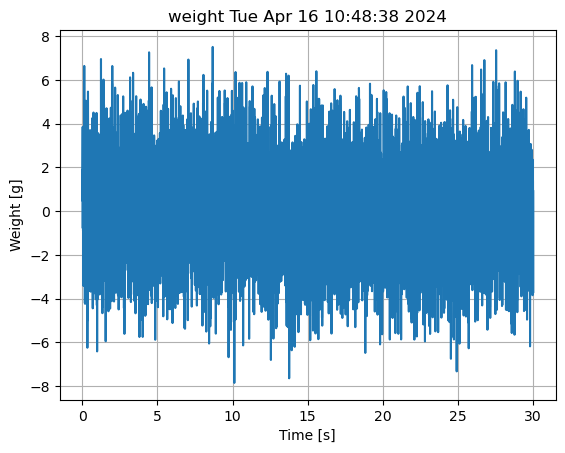

In [4]:
await d.test_true(duration=30, sample_rate=200)

Filterd range: ± 0.8 grams
Filtered std: σ= 0.2 grams


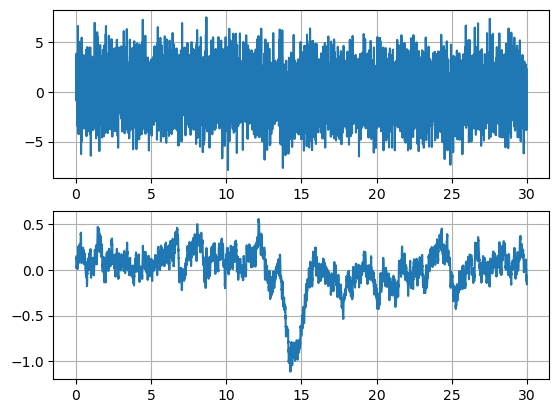

In [9]:
time = np.array(d.data['time'])
noisy_signal = np.array(d.data['weight'])
time -= min(time)
noisy_signal -= np.mean(noisy_signal)
cutoff = 0.5 # Hz
fs = 200
T = 1/fs
RC = 1/(cutoff*2*np.pi)
a = T/(T+RC)
b = RC/(T+RC)

filtered_signal = 0*noisy_signal
for i in range(len(noisy_signal)):
    filtered_signal[i] = a*noisy_signal[i] + b*filtered_signal[i-1]

fig, axs = plt.subplots(2, 1)
axs[0].plot(time, noisy_signal, label='Noisy Signal')
axs[0].grid(True)
axs[1].plot(time, filtered_signal, label='Filtered Signal')
axs[1].grid(True)

print('Filterd range: 'u"\u00B1"f' {(max(filtered_signal)-min(filtered_signal))/2:.1f} grams')
print('Filtered std: 'u'\u03C3'f'= {np.std(filtered_signal):.1f} grams')

### Plot Filter Data

STD:  3.346187765676306
Range: +/- 6.94267934887894


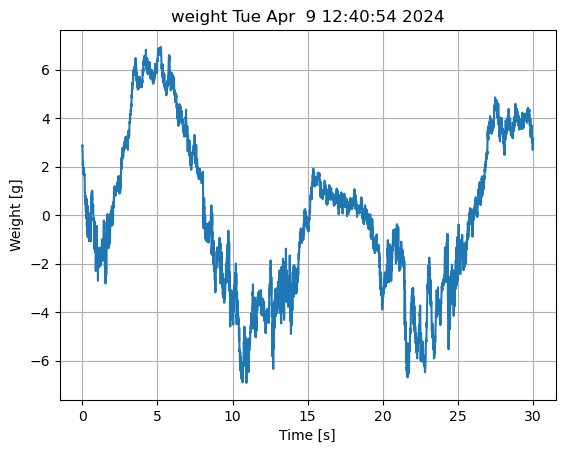

In [11]:
await d.test_filter(duration=30, sample_rate=200, cutoff=0.5)

### Plot Spectral Data

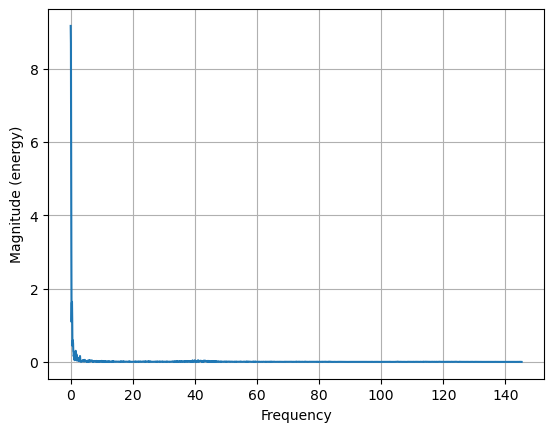

In [96]:
d.plot_spec()

## Dispensing

### Dispense

Dispensing...
Dispensed  116.2
STD:  19.739794064955543
Range: +/- 98.24194588714323


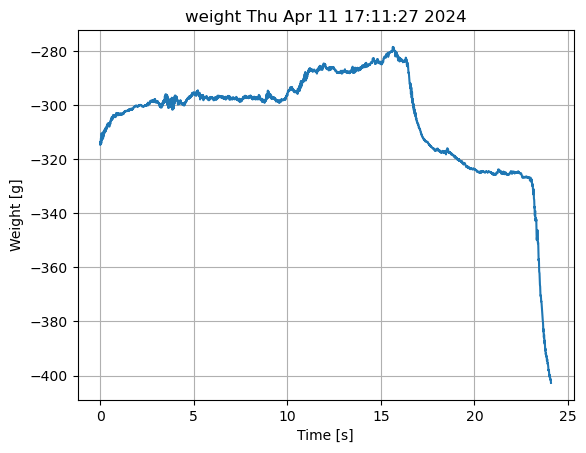

In [75]:
await d.dispense(serving=115, sample_rate=200, cutoff=0.5, rpm=500, offset=28, let_pass=3)

### Clear Dispenser

In [15]:
await m.enable()
await asyncio.sleep(1)
await m.jog(-2000)
await asyncio.sleep(30)
await m.stop()
await m.disable()

'\x02M0_'

In [37]:
await m.stop()
await m.disable()

'\x02M0_'

In [36]:
await m.enable()
await asyncio.sleep(.25)
await m.drive_write('JG300')

'\x02M0300'